In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('Iris(1).csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Checking general information about data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
train_data = data.drop(['Id'] , axis=1)
train_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
train_data['Species'].value_counts()


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
target = LE.fit_transform(train_data['Species'])
train_data['Species_coded'] = pd.DataFrame(target)

In [ ]:
train_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_coded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#Segregating the Depending and Independent variable

In [ ]:
x =train_data.drop(['Species' ,'Species_coded'] , axis=1)
y = train_data['Species_coded']

#Dividing data into train and test datset

In [ ]:
#Stratify=y
from sklearn.model_selection import train_test_split
train_x, test_x, train_y , test_y = train_test_split(x, y , random_state=56 , stratify=y)

#Importing the decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Clf = DecisionTreeClassifier()
Clf.fit(train_x, train_y)



None


#Making perdiction using Decision Tree Model

In [ ]:
test_predicted = Clf.predict(test_x)
Compare = pd.DataFrame({'Predicted':test_predicted , 'True value':test_y})
Compare.head()

,Predicted,True value
122,2,2
149,2,2
136,2,2
92,1,1
12,0,0


#Test Probabalities

In [ ]:
Clf.predict_proba(test_x)[: ,1]


array([0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0.])

#Train Probabilities

In [ ]:
Clf.predict_proba(train_x)[: , 1]

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

#Checking Accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
k = accuracy_score(test_y , Compare['Predicted'])
k
Clf.score(test_x , test_y)

0.9210526315789473

#Checking  Maximum Depth

In [ ]:
Train_Acc =[]
Test_Acc =[]
for depth in range(1 ,10):
  Clf = DecisionTreeClassifier(max_depth=depth , criterion='gini')
  Clf.fit(train_x , train_y)
  Train_Acc.append(Clf.score(train_x , train_y))
  Test_Acc.append(Clf.score(test_x, test_y))

print(Train_Acc)
print(Test_Acc)



[0.6696428571428571, 0.9732142857142857, 0.9732142857142857, 0.9910714285714286, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6578947368421053, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473]


In [ ]:
data = pd.DataFrame({'depth':range(1,10) ,"train_accuracy":Train_Acc ,'test_accuracy':Test_Acc})
data.head()

,depth,train_accuracy,test_accuracy
0,1,0.669643,0.657895
1,2,0.973214,0.921053
2,3,0.973214,0.921053
3,4,0.991071,0.921053
4,5,1.000000,0.894737


#Visualizing the Accuracy for various values of depth

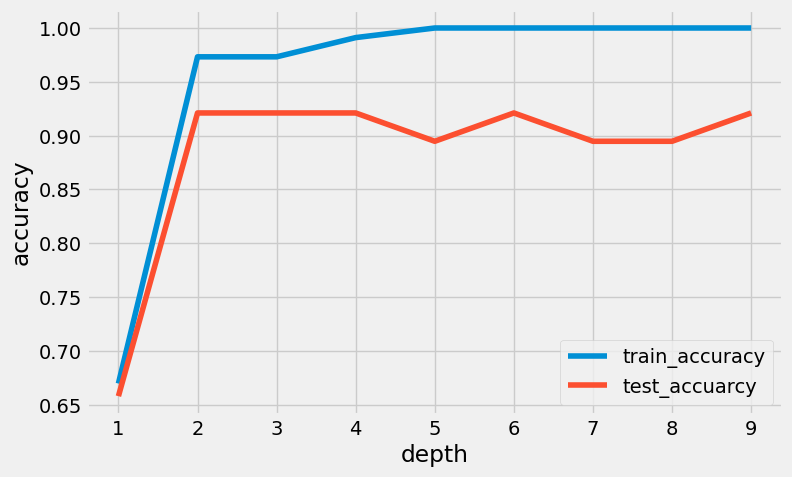

In [ ]:
plt.figure(figsize=(8,5) , dpi=100)
plt.style.use('fivethirtyeight')
plt.plot(data['depth'] , data['train_accuracy'] ,label='train_accuracy')
plt.plot(data['depth'] , data['test_accuracy'] , label='test_accuarcy')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#Max_Depth = 6

In [114]:
from sklearn.tree import DecisionTreeClassifier
Clf= DecisionTreeClassifier(max_depth=6 , random_state=10 , max_leaf_nodes=25 , criterion='gini')
Clf.fit(train_x, train_y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

#Visualizing Decision Tree

In [ ]:
!pip install graphviz

In [106]:
from sklearn import tree
decision_tree = tree.export_graphviz(Clf , out_file='tree.dot' , feature_names= train_x.columns , filled=True , max_depth=6)

In [107]:
#Converting tree.dot into tree.png
!dot -Tpng tree.dot -o tree.png

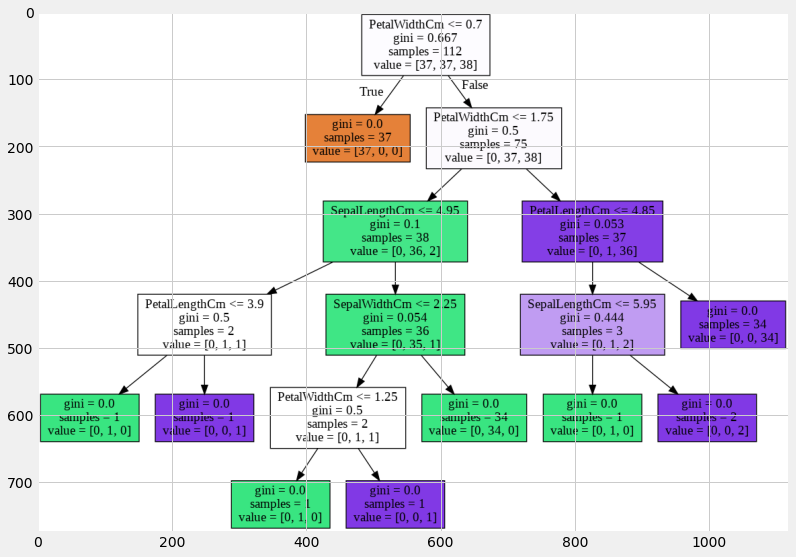

In [108]:
#Visualizing Tree image
image = plt.imread('tree.png')
plt.figure(figsize=(12,14))
plt.imshow(image)

In [ ]:
pip install dtreeviz

     |████████████████████████████████| 51kB 1.4MB/s 
     |████████████████████████████████| 204.2MB 67kB/s 
     |████████████████████████████████| 204kB 33.3MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1-cp36-none-any.whl size=52053 sha256=0b6b3d11ef2ccb7e8b634549f768aca7136d2adbfc8dbd9b839bc0356ff4ef76
  Stored in directory: /root/.cache/pip/wheels/b5/eb/5e/c29edcb1c8e009012fa248344fc745f90acef6083ba6376f17
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=8614fb0b152736f62130ccb42af2fc831355d601d258996002c7a314393bb84d
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


#Visualizing using dtreeviz

In [137]:
from dtreeviz.trees import dtreeviz 
label = ['Iris-setosa' ,'Iris-versicolor' ,'Iris-virginica']

viz = dtreeviz(Clf, train_x, train_y,
                target_name="target",
                feature_names=train_x.columns,
                class_names=label
                    
                )

viz.save('Tree_2.svg')

In [138]:

from IPython.core.display import display, HTML
display(HTML(viz.svg()))


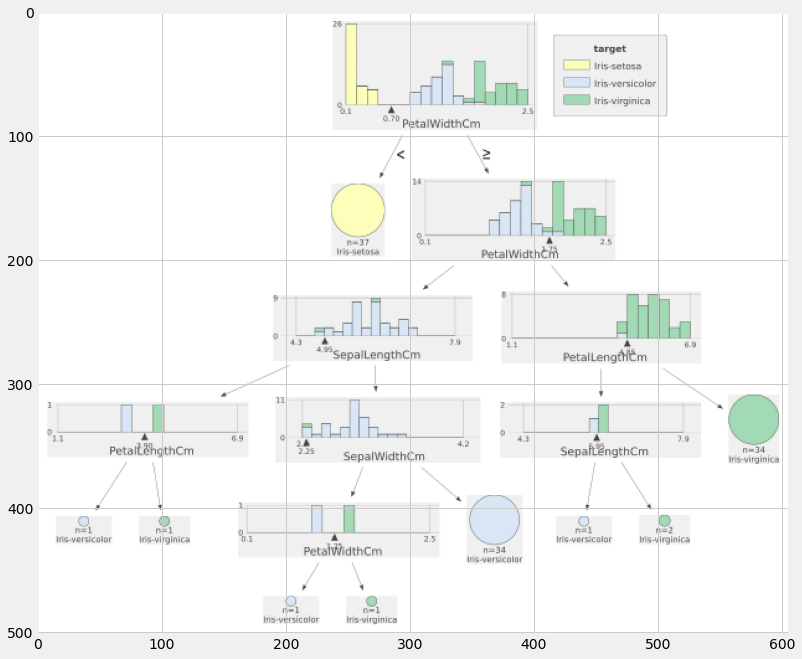

In [139]:
image = plt.imread('Tree_2(2).png')
plt.figure(figsize=(12,14))
plt.imshow(image)

#Evaluation of model

#Confusion Matrix

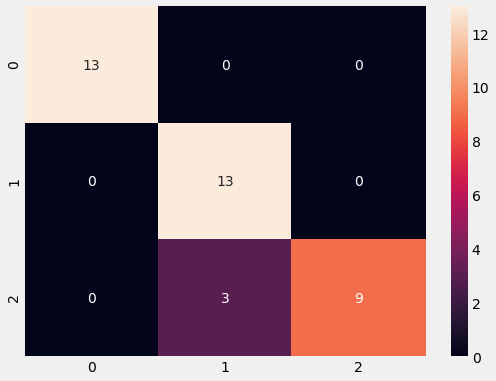

In [123]:
import seaborn as sns
plt.figure(figsize=(8,6))
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

Cm = confusion_matrix(test_y , test_predicted)
sns.heatmap(Cm , annot=True)
plt.show()

#Accuracy Score

In [126]:
score = accuracy_score(test_y , test_predicted)
print("Accuracy_Score: " , score)

Accuracy_Score:  0.9210526315789473


#Classification Report

In [135]:
clf_report = classification_report(test_y, test_predicted) 
print("=============Clissification Report============")
print(clf_report)


=============Clissification Report============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38

